In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_moons
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, balanced_accuracy_score

# 1. Chargez et préparez les données

In [ ]:
df = pd.read_csv('students.csv', sep=';')
y = df['Target']
y = y.map({'Graduate': 0, 'Dropout': 1, 'Enrolled': 2})
X = df.drop('Target', axis =1)
X.head(5)

In [11]:
print(f'Ce dataset contient {len(X)} exemples et {len(X.columns)} caracteristiqes')

Ce dataset contient 4424 exemples et 36 caracteristiqes


In [19]:
print(f'La classe 0 contient {len(y[y==0])} exemples la classe 1 contient {len(y[y==1])} exemples et la classe 2 contient {len(y[y==2])} exemples')

La classe 0 contient 2209 exemples la classe 1 contient 1421 exemples et la classe 2 contient 794 exemples


# 2. Séparez les données en un jeu d’entraînement et un jeu de test

In [20]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.5,
random_state =42)

# 3. Standardisez les données

In [21]:
std=StandardScaler()
X_train=std.fit_transform(X_train)
X_test=std.transform(X_test)

# 4. Déterminez les hyperparamètres optimaux du SVM à noyaux RBF en utilisant la validation croisée à 3 folds

In [26]:
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100,1000],  
    'gamma': [0.01, 0.1, 1, 10, 100]
}


grid_search = GridSearchCV(SVC(kernel='rbf'),param_grid, cv=3 ,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleure précision :", grid_search.best_score_)

Meilleurs paramètres : {'C': 10, 'gamma': 0.01}
Meilleure précision : 0.7707931149867807


# 5. Entrainez un SVM à noyaux RBF avec les hyperparamètres optimaux trouvés sur l’ensemble d’entraînement

In [31]:
clf=SVC(kernel='rbf',C=grid_search.best_params_['C'],gamma=grid_search.best_params_['gamma'])
clf.fit(X_train,y_train)
s=clf.score(X_train,y_train)
print(f'Le score sur les données d entrainement est : {s}') 

Le score sur les données d entrainement est : 0.8679927667269439


# 6. Évaluez les performances du modèle sur l’ensemble de test

In [32]:
s=clf.score(X_test,y_test)
print(f'Le score sur les données de test est : {s}') 

Le score sur les données de test est : 0.7509041591320073


# 7. Affichez la matrice de confusion

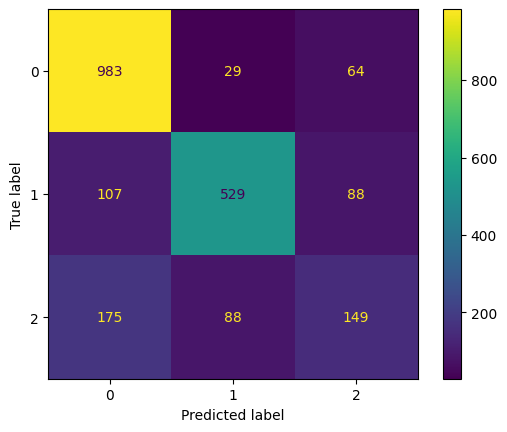

In [37]:
y_pred = clf.predict(X_test)
conf = confusion_matrix(y_test , y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf , display_labels=clf.classes_)
disp.plot()
plt.show()

## ` Selon la documentation une matrice de confusion C est tel que Cij represente le nombre d'exemples de la classe i que le modéle a predit comme etant de la classe j `

# 8. Les valeurs données par la fonction score de Scikit-learn peuvent être calculées à partir des valeurs de la matrice de confusion

In [45]:
nb_bonne_predi=983+529+149
score_matr=nb_bonne_predi/np.sum(conf)
print(f'score avec matrice de confusion est {score_matr} et c est la meme valeur que score a retourné')

score avec matrice de confusion est 0.7509041591320073 et c est la meme valeur que score a retourné


# `` Pour notre probleme le calcul de notre score n'est pas pertinent car on voit qu'on a 0.75  alors qu'on peut voir que notre modéle fait  plus d'erreur de classification que de bonne classification sur les exemples de la classe 2. La cause de cette non pertinence est que nos classes n'ont pas les meme proportions.De ce fait pour avoir un score qui prend en compte les performance du modéle sur chaque classe de maniére pertinent on peut pondére le nombre de bonne classification de chaque classe avec sa proportion sur les données d'apprentissage.``

# 9. Que pouvez-vous en conclure sur le comportement des méthodes de SVM à noyaux RBF ?

# ``On peut conclure que la frontiére de decision du noyau rbf prend en compte la proportion des classes de ce fait elle favorise les classes avec une grande proportion et penalise les autres``

In [54]:
balanced_accuracy_score(y_test, y_pred)

np.float64(0.6686274140321694)

# ``La valeur retournée par  balanced_accuracy_score est inferieur à celle retournée par la fonction score``